In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default figure size and style for all plots
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (14,5)

# All data files are in data/ folder (relative to notebook location)
DATA_DIR = "../data/"

In [2]:
# Load stock features with sentiment and macro already merged
df = pd.read_csv(DATA_DIR + "features.csv", parse_dates=['date'])

# Quick preview
print(df.head())
print(df.dtypes)


        date ticker  close_price  sentiment_score  usd_inr_rate  \
0 2019-01-01    TCS    1717.5715           0.0000         70.76   
1 2019-01-02    TCS    1736.0759           0.3818         70.76   
2 2019-01-03    TCS    1714.9988          -0.6486         70.76   
3 2019-01-03    TCS    1714.9988           0.0000         70.76   
4 2019-01-03    TCS    1714.9988          -0.3400         70.76   

   interest_rate  unemployment_rate  return_1  return_direction  
0           6.25                NaN       NaN                 1  
1           6.25                NaN  0.010774                 0  
2           6.25                NaN -0.012141                 0  
3           6.25                NaN  0.000000                 0  
4           6.25                NaN  0.000000                 0  
date                 datetime64[ns]
ticker                       object
close_price                 float64
sentiment_score             float64
usd_inr_rate                float64
interest_rate        

In [3]:
print("Missing values per column:")
print(df.isna().sum())


Missing values per column:
date                     0
ticker                   0
close_price              0
sentiment_score          0
usd_inr_rate             0
interest_rate            0
unemployment_rate    17076
return_1                 6
return_direction         0
dtype: int64


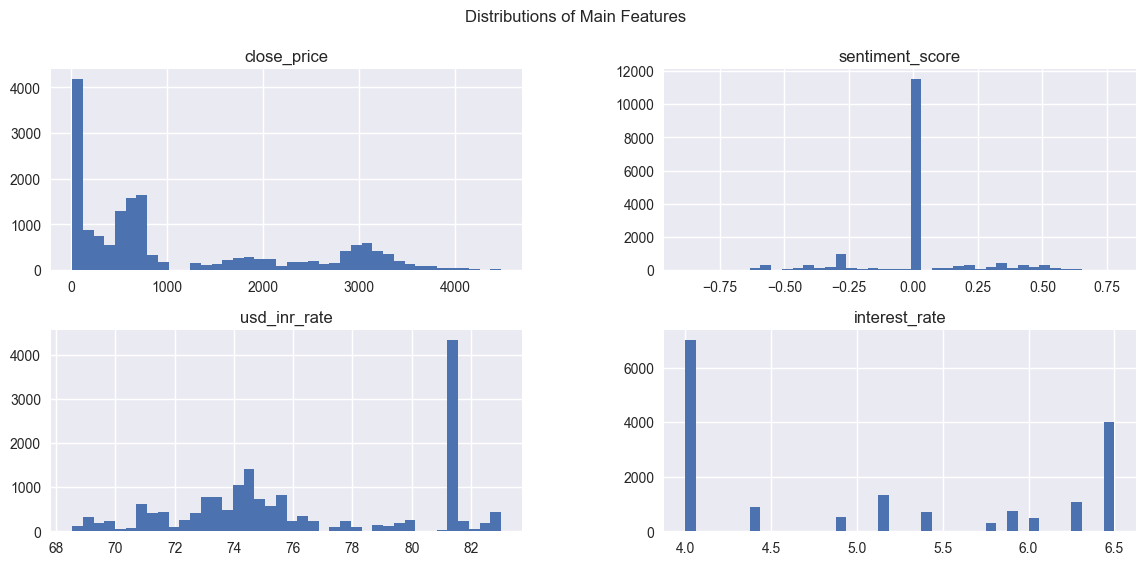

In [4]:
# Visualize numeric distributions
df[['close_price', 'sentiment_score', 'usd_inr_rate', 'interest_rate']].hist(bins=40, figsize=(14,6))
plt.suptitle('Distributions of Main Features')
plt.show()


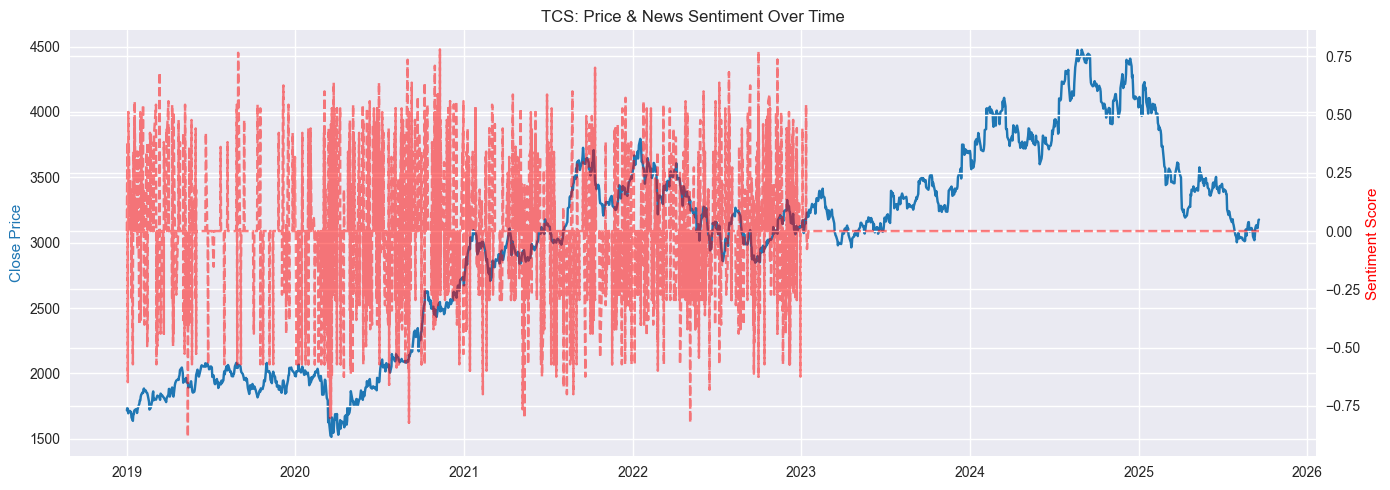

In [5]:
# Choose a ticker
ticker = "TCS"  # Change to 'LEMONTREE', etc if you wish

sub = df[df['ticker'] == ticker].sort_values('date')

# Price & sentiment
fig, ax1 = plt.subplots()
ax1.plot(sub['date'], sub['close_price'], label=f'{ticker} Price', color='tab:blue')
ax1.set_ylabel("Close Price", color='tab:blue')
ax2 = ax1.twinx()
ax2.plot(sub['date'], sub['sentiment_score'], 'r--', label="Sentiment (x100)", alpha=0.5)
ax2.set_ylabel("Sentiment Score", color='red')
plt.title(f"{ticker}: Price & News Sentiment Over Time")
fig.tight_layout(); plt.show()


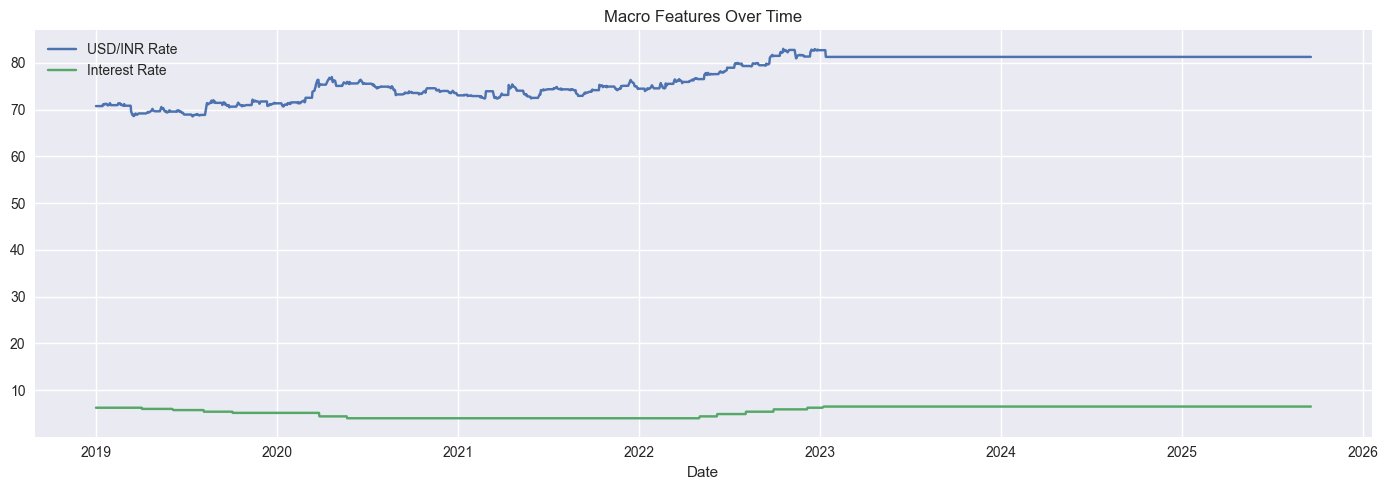

In [6]:
macro = df[['date','usd_inr_rate','interest_rate']].drop_duplicates().sort_values('date')
plt.plot(macro['date'], macro['usd_inr_rate'], label='USD/INR Rate')
plt.plot(macro['date'], macro['interest_rate'], label='Interest Rate')
plt.legend(); plt.title('Macro Features Over Time')
plt.xlabel('Date'); plt.tight_layout(); plt.show()


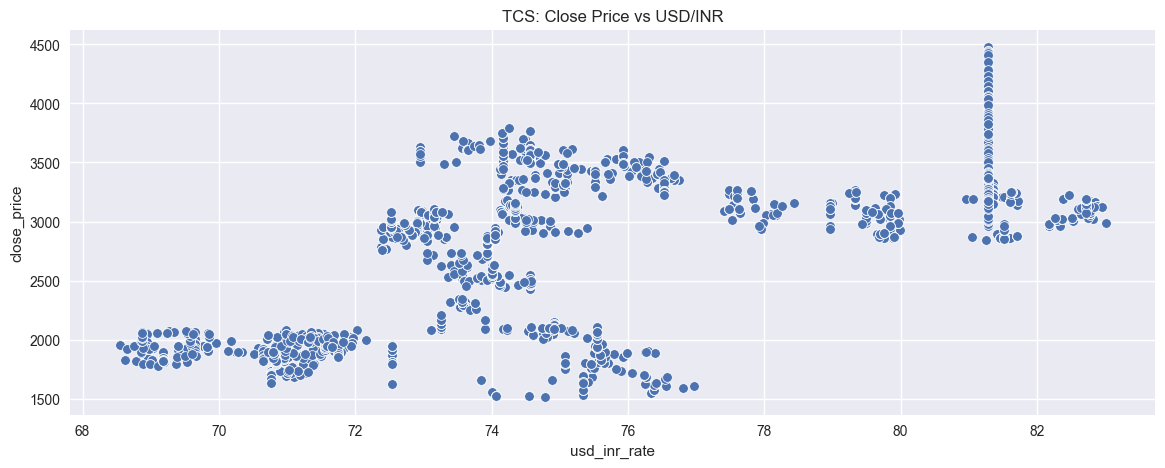

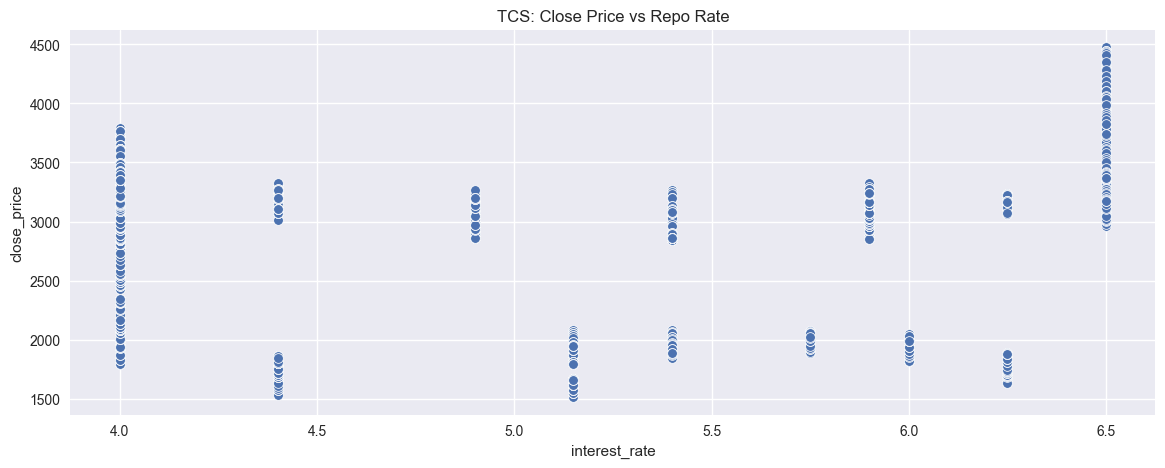

In [7]:
sns.scatterplot(data=sub, x='usd_inr_rate', y='close_price')
plt.title(f'{ticker}: Close Price vs USD/INR')
plt.show()

sns.scatterplot(data=sub, x='interest_rate', y='close_price')
plt.title(f'{ticker}: Close Price vs Repo Rate')
plt.show()


Accuracy: 0.6279523716572321
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      3611
           1       0.41      0.59      0.48      1512

    accuracy                           0.63      5123
   macro avg       0.60      0.62      0.60      5123
weighted avg       0.68      0.63      0.64      5123



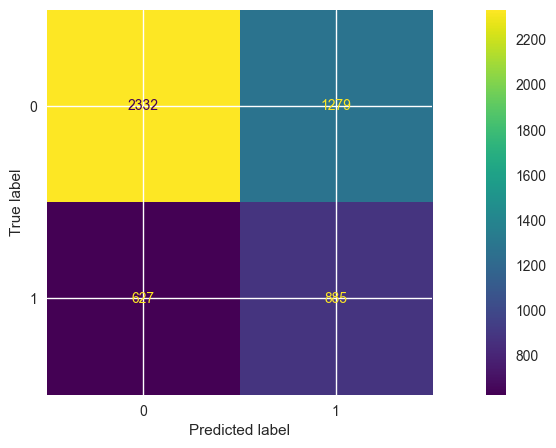

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

# Select features
features = ['close_price', 'sentiment_score', 'usd_inr_rate', 'interest_rate']
X = df[features]
y = df['return_direction']

# Split data (chronologically if possible; here random, just for basic demo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Fit RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


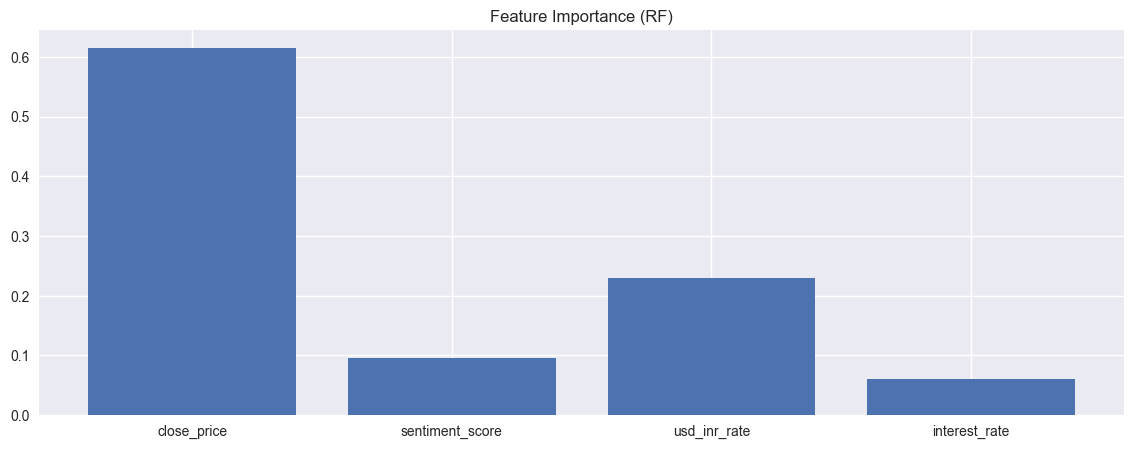

In [9]:
importances = rf.feature_importances_
plt.bar(features, importances)
plt.title('Feature Importance (RF)')
plt.show()
